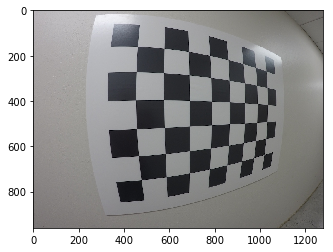

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/calibration_wide/GOPR0032.jpg')
plt.imshow(img)

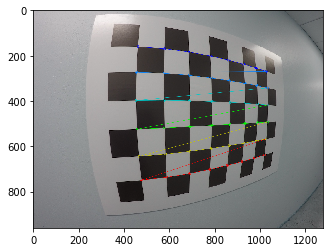

In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nx= 8
ny = 6
img=cv2.imread('/home/arnav08/PycharmProjects/Project 4/calibration_wide/GOPR0032.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)

if ret==True:
    cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
    plt.imshow(img)

In [ ]:

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('/home/arnav08/PycharmProjects/Project 4/calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        #cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)

ret, mtx, dist,rvecs,tvecs=cv2.calibrateCamera(objpoints,imgpoints, gray.shape[::-1],None,None)

#cv2.destroyAllWindows()

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [2]:
def warp(img):

    img_size=(img.shape[1],img.shape[0])
    #src=np.array([[850,329],
    #               [865,450],
    #               [533,350],
    #               [535,210]]
    #               )


    #dst=np.float32([[870,240],
    #               [870,370],
    #               [520,370],
    #               [520,240]]
    #               )
    
    src = np.array([[1180.15,407.742],[1578.85,407.742],[1578.85,605.61],[1180.15,605.61]],np.float32)
    dst = np.array([[1091.11,419.355],[1582.73,419.355],[1582.73,554.839],[1091.11,554.839]],np.float32)

    M = cv2.getPerspectiveTransform(src,dst)

    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped


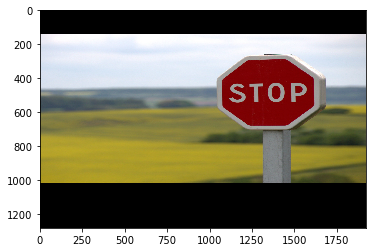

In [3]:

img=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/Stop.jpeg')
warped_im=warp(img)
plt.imshow(warped_im)

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if orient=='x':
        sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0)
        abs_sobel=np.absolute(sobelx)
    if orient=='y':
        sobely=cv2.Sobel(gray,cv2.CV_64F,0,1)
        abs_sobel=np.absolute(sobely)
    scaled_sobel=np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
  
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

FileNotFoundError: [Errno 2] No such file or directory: 'signs_vehicles_xygrad.png'

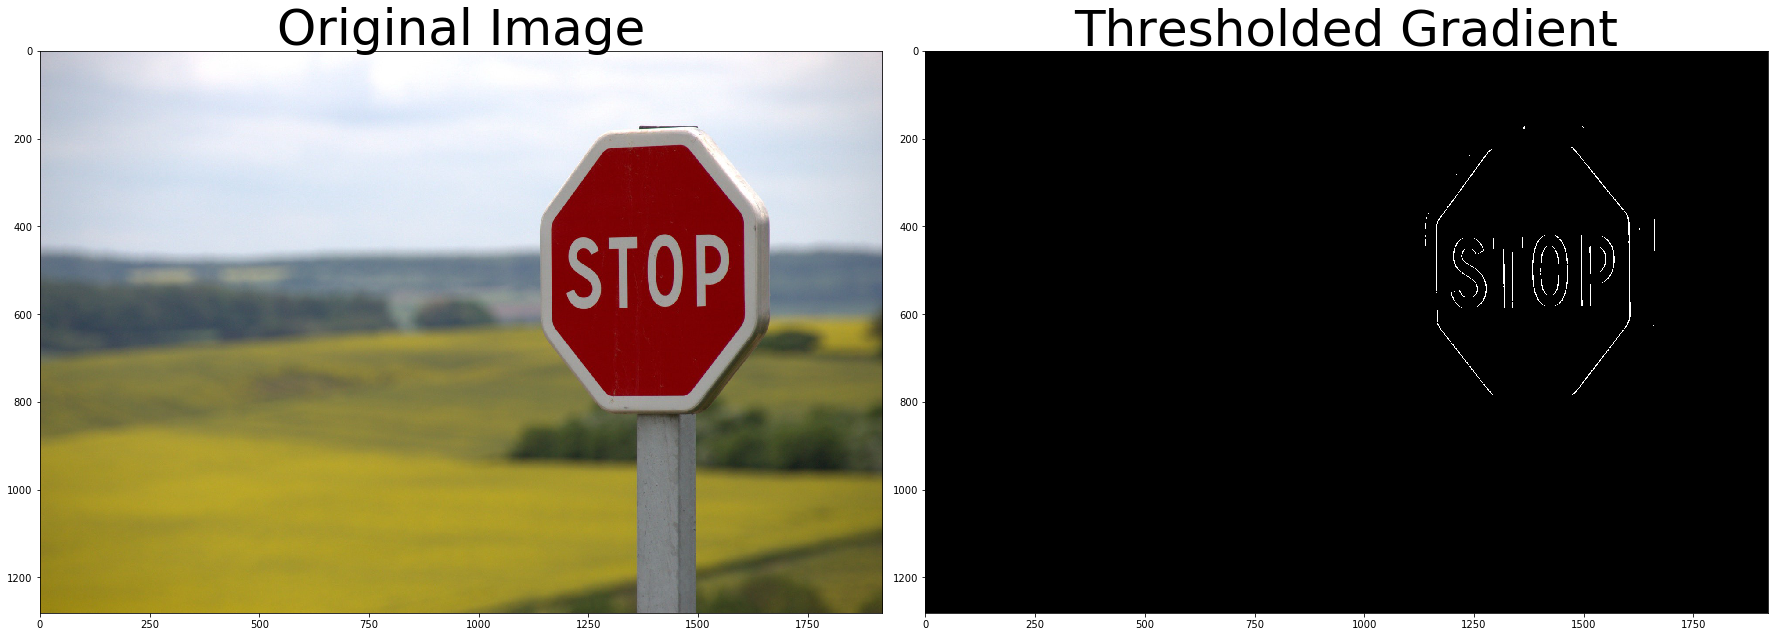

In [10]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle 

image= mpimg.imread('/home/arnav08/PycharmProjects/Project 4/Stop.jpeg')

def abs_sobel_thresh(image, orient='x', thresh_min=0, thresh_max=255):
    gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if orient=='x':
        sobel_x=cv2.Sobel(gray, cv2.CV_64F,1,0)
        abs_sobel= np.absolute(sobel_x)
    if orient=='y':
        sobel_y=cv2.Sobel(gray, cv2.CV_64F,0,1)
        abs_sobel= np.absolute(sobel_y)
    
    scaled=np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary=np.zeros_like(scaled)
    
    binary[(scaled>=thresh_min) & (scaled<=thresh_max)]=1
    
    return binary


grad_binary=abs_sobel_thresh(image,orient='x', thresh_min=70, thresh_max=200)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [33]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle 

image= mpimg.imread('/home/arnav08/PycharmProjects/Project 4/signs_vehicles_xygrad.jpg')

def abs_sobel_thresh(image, orient='x', kernel_size=3, thresh=(0,255)):
    gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if orient=='x':
        sobel_x=cv2.Sobel(gray, cv2.CV_64F,1,0)
        abs_sobel= np.absolute(sobel_x)
    if orient=='y':
        sobel_y=cv2.Sobel(gray, cv2.CV_64F,0,1)
        abs_sobel= np.absolute(sobel_y)
    
    scaled=np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary=np.zeros_like(scaled)
    
    binary[(scaled>=thresh[0]) & (scaled<=thresh[0])]=1
    return binary

def mag_sobel_thresh(image,kernel_size=3, mag_thresh=(0,255)):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    sobel_x=cv2.Sobel(gray,cv2.CV_64F,1,0, ksize=kernel_size)
    sobel_y=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=kernel_size)
    
    mag_sobel=np.sqrt(sobel_x**2 +sobel_y**2)
    
    scale_factor= np.max(mag_sobel)/255
    mag_sobel=(mag_sobel/scale_factor).astype(np.uint8)
    
    binary =  np.zeros_like(mag_sobel)
    binary[(mag_sobel>=mag_thresh[0]) & (mag_sobel<=mag_thresh[1])]=1
    
    return binary 

def dir_threshold(img, kernel_size=3, thresh=(0, np.pi/2)):
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary =  np.zeros_like(absgraddir)
    binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    return binary

ksize=3
gradx = abs_sobel_thresh(image, orient='x', kernel_size=ksize, thresh=(10, 100))
grady = abs_sobel_thresh(image, orient='y',kernel_size=ksize, thresh=(200, 255))
mag_binary = mag_sobel_thresh(image, kernel_size=ksize, mag_thresh=(100, 200))
dir_binary = dir_threshold(image, kernel_size=ksize, thresh=(np.pi/9, np.pi/2))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

    

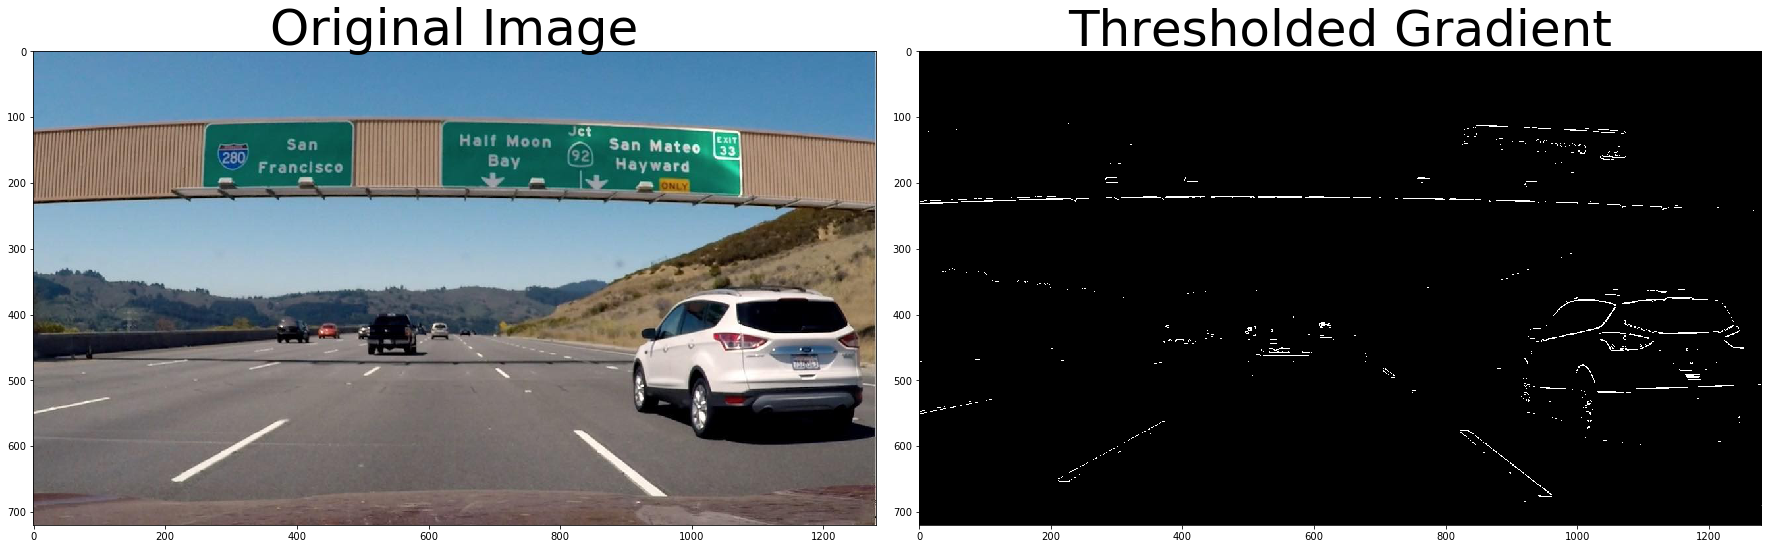

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


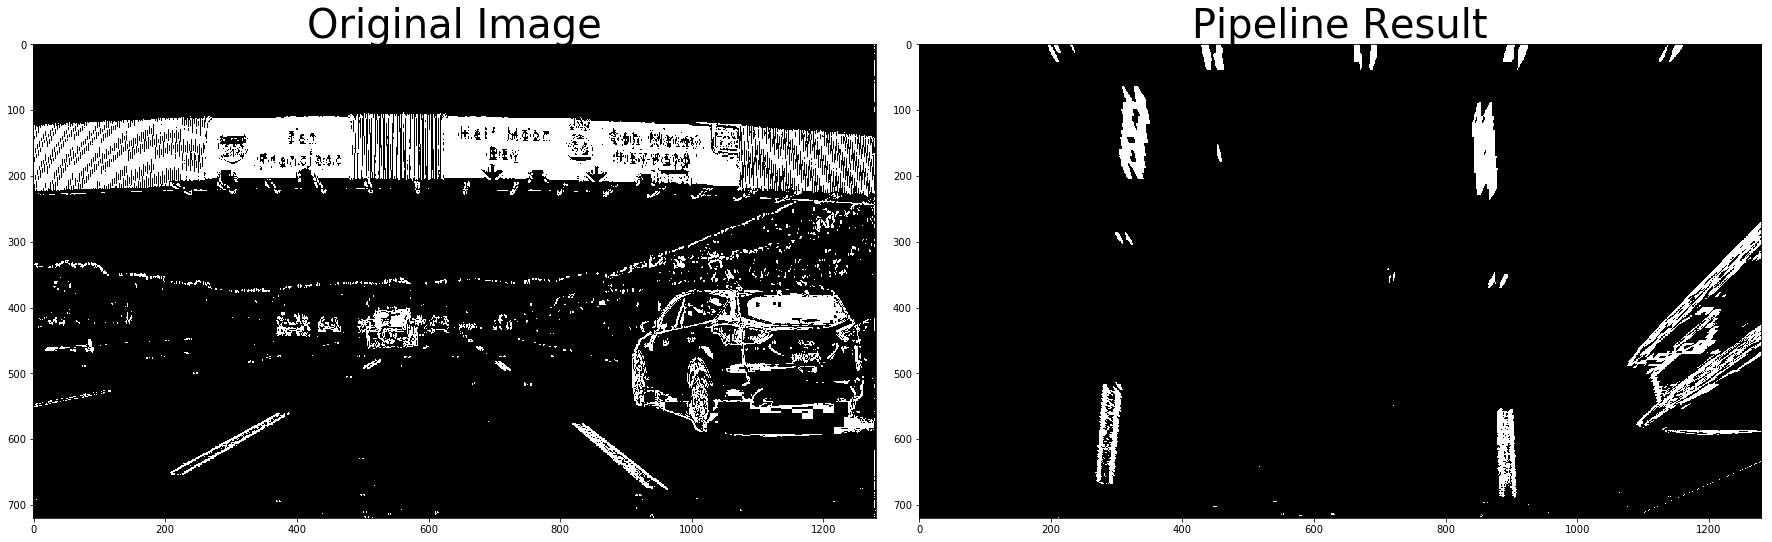

ValueError: attempt to get argmax of an empty sequence

In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def lane_pipeline(image, s_thresh=(170,255), sx_thresh=(20,100)):
    hls=cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    l_channel=hls[:,:,1]
    s_channel=hls[:,:,2]

    #Sobel in the x direction
    sobel_x=cv2.Sobel(gray,cv2.CV_64F,1,0)
    abs_sobelx=np.absolute(sobel_x)
    scaled_sobel=np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    #Threshold x gradient
    sxbinary=np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel>=sx_thresh[0]) & (scaled_sobel<=sx_thresh[1])]=1

    #Threshold color channel
    s_binary=np.zeros_like(s_channel)
    s_binary[(s_channel>=s_thresh[0]) & (s_channel<=s_thresh[1])]=1

    color_binary = np.dstack((np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return combined_binary

def warp(img):
    img_size = (img.shape[1], img.shape[0])
    src = np.array([[91.4291, 718.468], [1021.46, 718.468], [711.63, 473.525], [515.621, 473.525]], np.float32)
    dst = np.array([[271.63, 718.468], [908.028,718.468], [906.028, 0], [271.617, 0]], np.float32)
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped




img=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/signs_vehicles_xygrad.jpg')
result=lane_pipeline(img)
warped_im=warp(result)
#plt.imshow(warped_im)
#plt.show()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(result,cmap='gray')
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(warped_im,cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


histogram = np.sum(warped_im[warped_im.shape[0]//2:,:], axis=0)
#creating an output image to draw on and visualize the result

out_image=np.dstack((warped_im,warped_im,warped_im))*255
midpoint=np.argmax(histogram.shape[0]/2)
leftx_base=np.argmax(histogram[:midpoint])
#rightx_base= np.argmax(histogram[midpoint:]) +midpoint

#Number of sliding windows

#nwindows=9
#window_height=np.int(warped_im.shape[0]/nwindows)

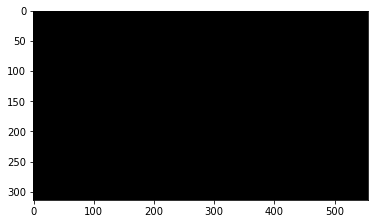

In [3]:
#img=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/Lane.png')
img=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/signs_vehicles_xygrad.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hls=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

l_channel=hls[:,:,1]
h_channel=hls[:,:,0]
s_channel=hls[:,:,2]
#plt.imshow(s_channel)

s_binary=np.zeros_like(s_channel)
s_binary[(s_channel>70) & (s_channel<=200)]=1
plt.imshow(s_binary,cmap='gray')

In [19]:
import math 

a=math.log(2/3,2)
b=math.log(1/3,2)
entropy=((-2/3)*a) -((1/3)*b)
print(entropy)

0.9182958340544896


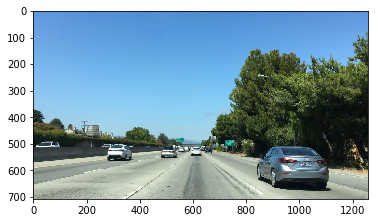

In [20]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/bbox-example-image.jpg')
plt.imshow(image)

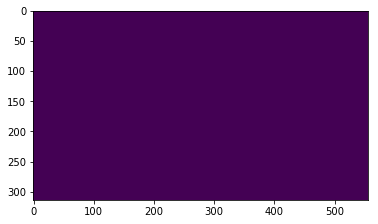

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


def abs_sobelx(image, sx_thresh=(20,200)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    abs_sobelx = np.absolute(sobel_x)
    scaled_sobel = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel > sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

    return sxbinary

def dir_sobel(image, thresh=(0,np.pi/2)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx=cv2.Sobel(gray, cv2.CV_64F,1,0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_sobel_x = np.absolute(sobelx)
    abs_sobel_y = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    dir = np.arctan2(abs_sobel_y, abs_sobel_x)
    dir = np.absolute(dir)
    # 5) Create a binary mask where direction thresholds are met
    scaled_dir = np.zeros_like(dir)
    scaled_dir[(dir >= thresh[0]) & (dir <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return scaled_dir


def combined(image,smin=20, smax=21):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    S = hls[:, :, 2]
    L = hls[:, :, 1]
    s_binary=np.zeros_like(S)
    s_binary[(S>smin) & (S<=smax)]=1


    return s_binary


def get_thresholded_image(img):

    # convert to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    height, width = gray.shape

    # apply gradient threshold on the horizontal gradient
    sx_binary = abs_sobel_thresh(gray, 'x', 10, 200)

    # apply gradient direction threshold so that only edges closer to vertical are detected.
    dir_binary = dir_threshold(gray, thresh=(np.pi / 6, np.pi / 2))

    # combine the gradient and direction thresholds.
    combined_condition = ((sx_binary == 1) & (dir_binary == 1))

    # R & G thresholds so that yellow lanes are detected well.
    color_threshold = 150
    R = img[:, :, 0]
    G = img[:, :, 1]
    color_combined = np.zeros_like(R)
    r_g_condition = (R > color_threshold) & (G > color_threshold)

    # color channel thresholds
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:, :, 2]
    L = hls[:, :, 1]

    # S channel performs well for detecting bright yellow and white lanes
    s_thresh = (100, 255)
    s_condition = (S > s_thresh[0]) & (S <= s_thresh[1])

    # We put a threshold on the L channel to avoid pixels which have shadows and as a result darker.
    l_thresh = (120, 255)
    l_condition = (L > l_thresh[0]) & (L <= l_thresh[1])

    # combine all the thresholds
    # A pixel should either be a yellowish or whiteish
    # And it should also have a gradient, as per our thresholds
    color_combined[(r_g_condition & l_condition) & (s_condition | combined_condition)] = 1

    # apply the region of interest mask
    mask = np.zeros_like(color_combined)
    region_of_interest_vertices = np.array([[0, height - 1], [width / 2, int(0.5 * height)], [width - 1, height - 1]],
                                           dtype=np.int32)
    cv2.fillPoly(mask, [region_of_interest_vertices], 1)
    thresholded = cv2.bitwise_and(color_combined, mask)

    return thresholded


def abs_sobel_thresh(gray, orient='x', thresh_min=0, thresh_max=255):
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_sobel = np.absolute(sobel)
    max_value = np.max(abs_sobel)
    binary_output = np.uint8(255 * abs_sobel / max_value)
    threshold_mask = np.zeros_like(binary_output)
    threshold_mask[(binary_output >= thresh_min) & (binary_output <= thresh_max)] = 1
    return threshold_mask


def dir_threshold(gray, sobel_kernel=3, thresh=(0, np.pi / 2)):
    # Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    direction = np.arctan2(abs_sobel_y, abs_sobel_x)
    direction = np.absolute(direction)
    # 5) Create a binary mask where direction thresholds are met
    mask = np.zeros_like(direction)
    mask[(direction >= thresh[0]) & (direction <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return mask

img=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/Lane.png')
im=get_thresholded_image(img)
plt.imshow(im)
plt.show()